In [1]:
import rdflib
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.extras.external_graph_libs import rdflib_to_networkx_digraph, rdflib_to_networkx_multidigraph
import pandas as pd
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
data = '''subject\tpredicate\tobject
0\tpolice squad\tcorners\tTrinity
1\tTrinity\toverpowers\tpolice squad
2\tTrinity\tcontacts\tNeo
3\tTrinity\ttells\tNeo
4\tTrinity\thas\tanswers
5\tTrinity\tseeks\tNeo
6\tthey\tfuse\this mouth
7\tthey\timplant\ta robotic bug
8\tNeo\ttakes\tthe red pill
10\tcountless other pods\tcontaining\tother humans
12\ta group of rebels\tunplug\tenslaved humans
13\ta group of rebels\trecruit\tthem
14\tMorpheus\twarns\tNeo
15\tthe Agents\tare\tsentient programs
17\tmachines\tcalled\tSentinels
19\tthe group\tenters\tthe Matrix
20\tthe group\tvisits\tthe Oracle
22\tShe\timplies\tto Neo
23\tNeo\tis\tnot the One
25\tAgents and police\tambush\tthe group
26\tCypher\tbetrayed\tMorpheus
27\tMorpheus\tfights\tSmith
28\tCypher\texits\tthe Matrix
30\tCypher\tkill\tNeo and Trinity
31\tTank\tkills\tCypher
32\tTank\tpulling\tNeo and Trinity
33\tThe Agents\tinterrogate\tMorpheus
34\tMorpheus\tlearn\this access codes
37\tTrinity\tinsists\tshe accompany him
38\tNeo\trescuing\tMorpheus
41\tSmith\tambushes\tNeo
42\ta group of Sentinels\tattack\tthe Nebuchadnezzar
43\tTrinity\tconfesses\ther love for Neo
45\tNeo\tdefeats\tSmith
47\the\tleaves\tthe Matrix
49\tNeo\tmakes\ta telephone call
50\tNeo\tpromising\tthe machines'''

# Convert the multi-line string into a file-like object
data_file = StringIO(data)

# Load the data into a pandas DataFrame
df = pd.read_csv(data_file, sep='\t')

df

,subject,predicate,object
0,police squad,corners,Trinity
1,Trinity,overpowers,police squad
2,Trinity,contacts,Neo
3,Trinity,tells,Neo
4,Trinity,has,answers
5,Trinity,seeks,Neo
6,they,fuse,his mouth
7,they,implant,a robotic bug
8,Neo,takes,the red pill
10,countless other pods,containing,other humans


police squad does not look like a valid URI, trying to serialize this will break.
countless other pods does not look like a valid URI, trying to serialize this will break.
a group of rebels does not look like a valid URI, trying to serialize this will break.
a group of rebels does not look like a valid URI, trying to serialize this will break.
the Agents does not look like a valid URI, trying to serialize this will break.
the group does not look like a valid URI, trying to serialize this will break.
the group does not look like a valid URI, trying to serialize this will break.
Agents and police does not look like a valid URI, trying to serialize this will break.
The Agents does not look like a valid URI, trying to serialize this will break.
a group of Sentinels does not look like a valid URI, trying to serialize this will break.


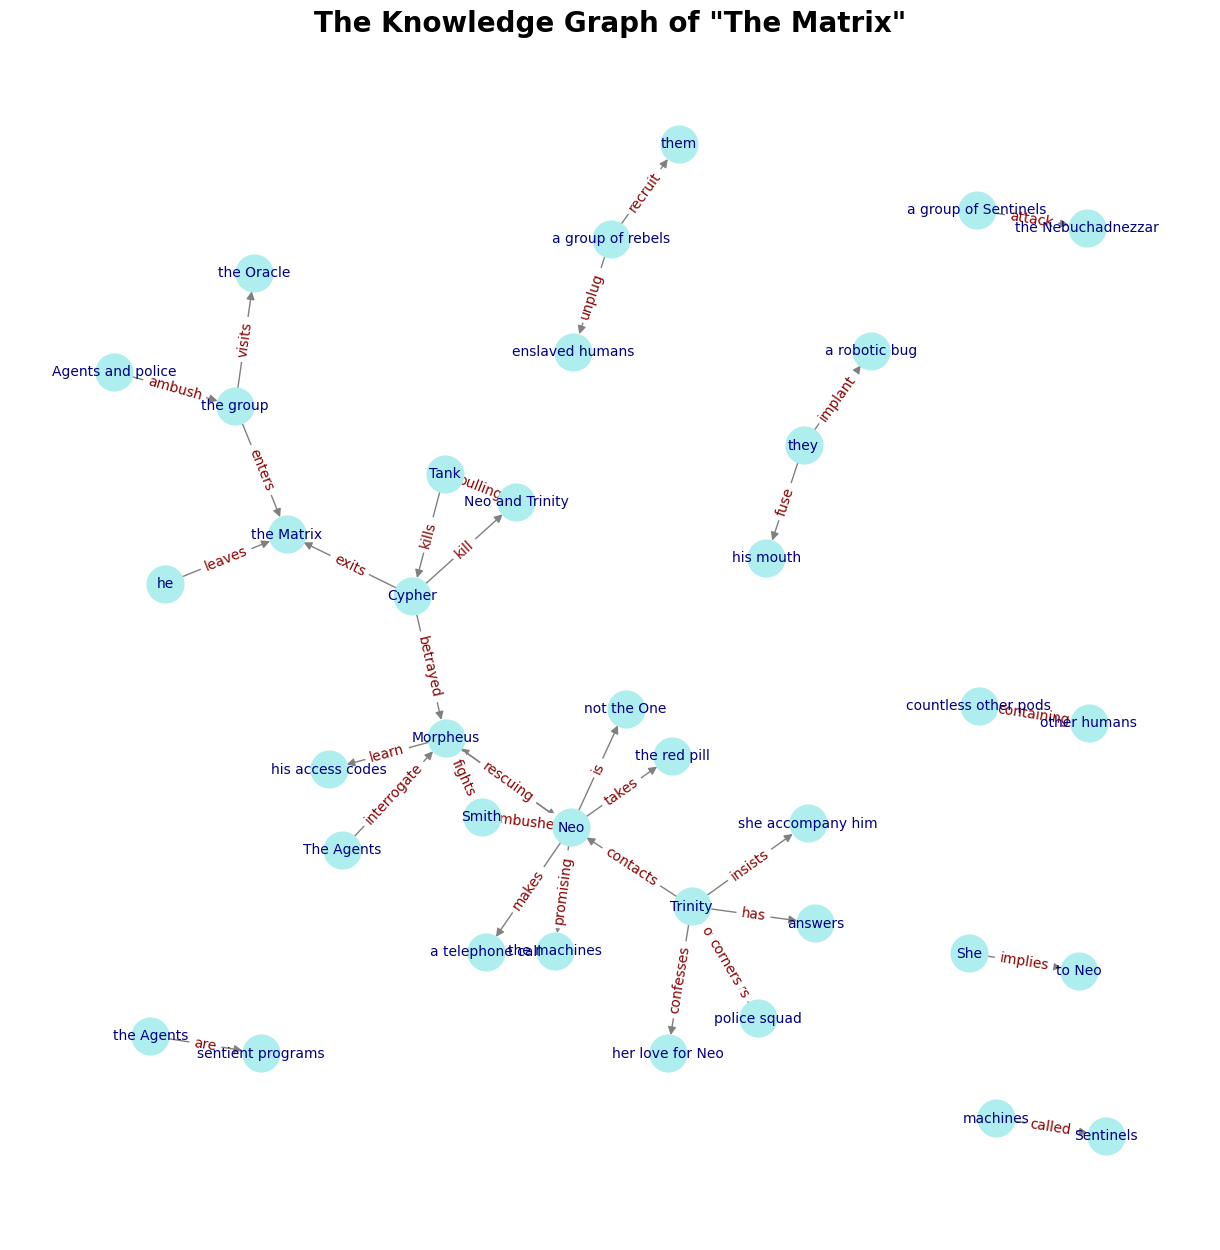

In [3]:
# Create the knowledge graph of the cut_df

g = Graph()
for index, row in df.iterrows():
    subject = URIRef(row['subject'])
    predicate = URIRef(row['predicate'])
    obj = Literal(row['object'])
    g.add((subject, predicate, obj))

G = rdflib_to_networkx_digraph(g)
rnodes=G.nodes()
mapping = {n:str(n) for n in G.nodes()}  
G = nx.relabel_nodes(G, mapping)

labels={}
for e in G.edges(data=True):
    labels[(e[0],e[1])]=e[2]['triples'][0][1] 
labels={k:str(v) for k,v in labels.items()}

# Visualize the knowledge graph in matplotlib

plt.figure(figsize=(12, 12))
pos = graphviz_layout(G) 
nx.draw(G, pos, with_labels=True, font_size=10, node_size=700, arrowsize=12, node_color='paleturquoise', edge_color='gray',font_color='navy') #, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10,font_color='darkred') #label_pos=0.3,, verticalalignment='baseline'
plt.title('The Knowledge Graph of "The Matrix"',fontsize=20,fontweight='bold')
plt.show()